<a href="https://colab.research.google.com/github/shaharec/intro-to-Tensorflow-for-Deep-Learning/blob/master/l05c01_dogs_vs_cats_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs Cats Image classification Without Image Augmentation

#importing Packeges

In [44]:
#import machine learning libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import numpy as np


#import os for reading files
import os

#import visualiztion libraries 
import matplotlib.pyplot as plt



In [ ]:
#display only errors from tensorflow
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#Data Loading 
to build our cats and dogs classifier we will use a filtered version of <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> dataset from Kaggle (ultimately, this dataset is provided by Microsoft Research).


In previous Colabs, we've used <a href="https://www.tensorflow.org/datasets" target="_blank">TensorFlow Datasets</a>, which is a very easy and convenient way to use datasets. In this Colab however, we will make use of the class `tf.keras.preprocessing.image.ImageDataGenerator` which will read data from disk. We therefore need to directly download *Dogs vs. Cats* from a URL and unzip it to the Colab filesystem.

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We can list the directories with the following terminal command:

In [ ]:
#lets see the directories from the terminal
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


Lets assing variavles for all file paths

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

#save paths of cats and dogs for training ad validation
val_cats_dir =  os.path.join(val_dir,'cats') 
val_dogs_dir =  os.path.join(val_dir,'dogs') 

train_cats_dir = os.path.join(train_dir,'cats') 
train_dogs_dir = os.path.join(train_dir,'dogs') 

In [ ]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

#Understanding the data
Lets look at some attributs of the data such as :


*   number of training data 
*   number of validation data



In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_cats_val = len(os.listdir(val_cats_dir))

num_dogs_tr = len(os.listdir(train_dogs_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

In [ ]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


#Setting model parameters
*  batch size
*  image shape

In [32]:
BATCH_SIZE = 100
IMG_SHAPE = 150

#Data preparaion 
in this step we will read the data from the memory and st it up for the model.
steps:
*  read image from disk
*  decoade contact of these images to convert for the right format.
* convert the images to a floating tensore.
*  rescale the image , for small input values of the network.

We will preforme all of those tasks with ***ImageDataGenerator*** tools.

In [33]:
train_image_generator = ImageDataGenerator(rescale =1./255)
val_image_generator = ImageDataGenerator(rescale =1./255)

Now lets get all of oure images from the disk.
The **flow_from_directory** method will load them.

In [36]:
train_df = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle = True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [37]:
val_df = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory=val_dir,
                                                     shuffle = True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')


Found 1000 images belonging to 2 classes.


#Visualize Training images
lets use matplotlib for visulizing our images

In [38]:
#get some samples for visulizing
sample_tr,_ = next(train_df)

In [55]:
def plotImg(image_arr):
  fig, axes = plt.subplots(1, 5,figsize = (20,20))#1 row and 5 columns
  axes = axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

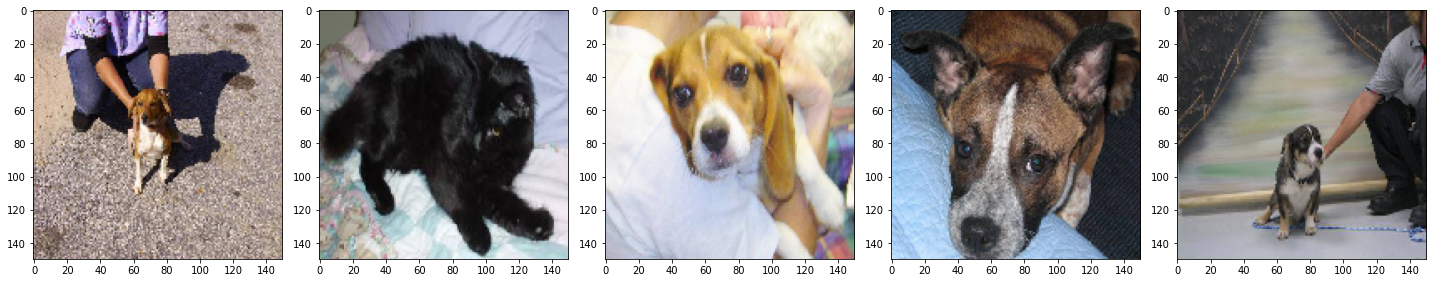

In [56]:
plotImg(sample_tr[:5])

#Model creation
##define the model:
Conv2D(32,3X3)->MaxPolling2D(2,2)->Conv2D(64,3X3)->MaxPolling2D(2,2)->Conv2D(128,3X3)->MaxPolling2D(2,2)->Conv2D(128,3X3)->MaxPolling2D(2,2)->flattenlayer->Dense(512)->Dense(2).
All activations is Relu exept the last one (softmax) for getting the presenteg.

In [69]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',
                                 input_shape = (IMG_SHAPE,IMG_SHAPE,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))


model.add(tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))


model.add(tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation = 'relu'))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))


#Compile the model
after building the architecture of the network, we will need to compile it.
we will use:
*  Adam optimizer.
*  Sparse Categorical Crossentropy as the loss function.
*  accuracy metrics

In [70]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

#Model summery
Lets view the model Summery

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

#Train the model

In [86]:
Epochs = 100
history = model.fit_generator(
    train_df,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=Epochs,
    validation_data=val_df,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 8s 424ms/step - loss: 7.4323e-06 - accuracy: 1.0000 - val_loss: 2.2693 - val_accuracy: 0.7530
Epoch 2/100
20/20 [==============================] - 8s 405ms/step - loss: 7.2624e-06 - accuracy: 1.0000 - val_loss: 2.2733 - val_accuracy: 0.7530
Epoch 3/100
20/20 [==============================] - 8s 405ms/step - loss: 7.1360e-06 - accuracy: 1.0000 - val_loss: 2.2772 - val_accuracy: 0.7530
Epoch 4/100
20/20 [==============================] - 8s 410ms/step - loss: 6.8721e-06 - accuracy: 1.0000 - val_loss: 2.2776 - val_accuracy: 0.7520
Epoch 5/100
20/20 [==============================] - 8s 412ms/step - loss: 6.7054e-06 - accuracy: 1.0000 - val_loss: 2.2745 - val_accuracy: 0.7570
Epoch 6/100
20/20 [==============================] - 8s 412ms/step - loss: 6.7285e-06 - accuracy: 1.0000 - val_loss: 2.2799 - val_accuracy: 0.7570
Epoch 7/100
20/20 [==============================] - 8s 403ms/step - loss: 6.5352e-06 - accuracy: 1.0000 - val_loss: 2

#Visualizing results of training
lets visualize the resulats

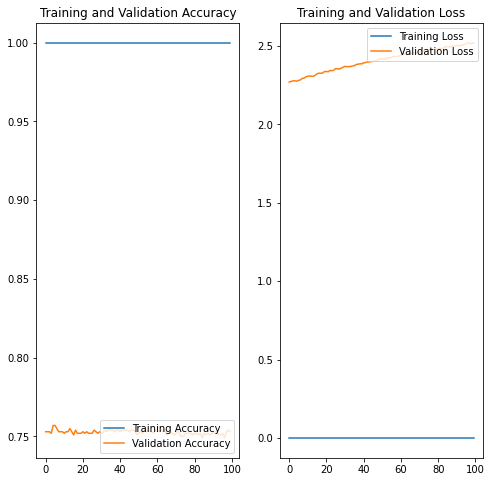

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()